In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [31]:
# too sequences, 4 numbers each
data = [[[(i+j)/100] for i in range(5)] for j in range(100)]
print(data)

# 100 targets - fifth number
target = [(i+5)/100 for i in range (100)]
print(target)

X = np.array(data, dtype=float)
y = np.array(target, dtype=float)

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[[0.0], [0.01], [0.02], [0.03], [0.04]], [[0.01], [0.02], [0.03], [0.04], [0.05]], [[0.02], [0.03], [0.04], [0.05], [0.06]], [[0.03], [0.04], [0.05], [0.06], [0.07]], [[0.04], [0.05], [0.06], [0.07], [0.08]], [[0.05], [0.06], [0.07], [0.08], [0.09]], [[0.06], [0.07], [0.08], [0.09], [0.1]], [[0.07], [0.08], [0.09], [0.1], [0.11]], [[0.08], [0.09], [0.1], [0.11], [0.12]], [[0.09], [0.1], [0.11], [0.12], [0.13]], [[0.1], [0.11], [0.12], [0.13], [0.14]], [[0.11], [0.12], [0.13], [0.14], [0.15]], [[0.12], [0.13], [0.14], [0.15], [0.16]], [[0.13], [0.14], [0.15], [0.16], [0.17]], [[0.14], [0.15], [0.16], [0.17], [0.18]], [[0.15], [0.16], [0.17], [0.18], [0.19]], [[0.16], [0.17], [0.18], [0.19], [0.2]], [[0.17], [0.18], [0.19], [0.2], [0.21]], [[0.18], [0.19], [0.2], [0.21], [0.22]], [[0.19], [0.2], [0.21], [0.22], [0.23]], [[0.2], [0.21], [0.22], [0.23], [0.24]], [[0.21], [0.22], [0.23], [0.24], [0.25]], [[0.22], [0.23], [0.24], [0.25], [0.26]], [[0.23], [0.24], [0.25], [0.26], [0.27]], [[

In [49]:
model = Sequential()
model.add(LSTM((1), batch_input_shape=(None, X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM((1), return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()

history = model.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 5, 1)              12        
                                                                 
 lstm_8 (LSTM)               (None, 1)                 12        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
3/3 [==============================] - 4s 414ms/step - loss: 0.5594 - val_loss: 0.4947
Epoch 2/400
3/3 [==============================] - 0s 16ms/step - loss: 0.5566 - val_loss: 0.4920
Epoch 3/400
3/3 [==============================] - 0s 15ms/step - loss: 0.5539 - val_loss: 0.4893
Epoch 4/400
3/3 [==============================] - 0s 15ms/step - loss: 0.5511 - val_loss: 0.4866
Epoch 5/400
3/3 [==============================] - 0s 15ms/st

In [50]:
results = model.predict(X_test)
print(results)

[[0.8301022 ]
 [0.598978  ]
 [0.75608695]
 [0.50596315]
 [0.4939884 ]
 [0.4342509 ]
 [0.25584626]
 [0.81614584]
 [0.16926453]
 [0.12122473]
 [0.22312036]
 [0.3328351 ]
 [0.7764851 ]
 [0.36524794]
 [0.85676837]
 [0.13814552]
 [0.79478097]
 [0.80043566]
 [0.18133353]
 [0.34345016]]


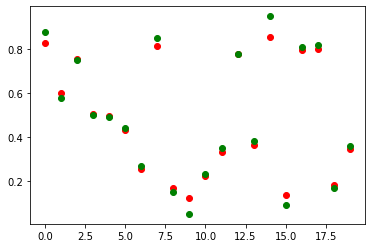

In [51]:
plt.scatter(range(20), results, c='r')
plt.scatter(range(20),y_test, c='g')
plt.show()

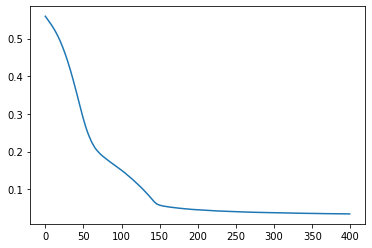

In [52]:
plt.plot(history.history['loss'])
plt.show()